In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read the Iris dataset as a pandas dataframe and observe the first 5 observations
df = pd.read_csv('Iris.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Determine the unque items in the Species column

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
#Copy the df dataframe into a new dataframe df_new

df_new = df.copy()

#Replace both the Iris-virginica and the Iris-versicolor to not-'Iris-setosa'
df_new['Species'].replace("Iris-versicolor", "not-'Iris-setosa'", inplace=True)
df_new['Species'].replace("Iris-virginica", "not-'Iris-setosa'", inplace=True)
      

/var/folders/fm/q8xt4t_j1_v5d1tb7yns0t0m0000gn/T/ipykernel_45428/1449901848.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Species'].replace("Iris-versicolor", "not-'Iris-setosa'", inplace=True)
/var/folders/fm/q8xt4t_j1_v5d1tb7yns0t0m0000gn/T/ipykernel_45428/1449901848.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [33]:
#Check the unique items in the df_new['Species'] column

df_new['Species'].nunique()

2

In [41]:
#Now use the Label Encoder to encode the Species catagorical variable
from sklearn.preprocessing import LabelEncoder

df_new['Species'] = LabelEncoder().fit_transform(df_new['Species'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [42]:
#Visualise the first 5 observations
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [43]:
df_new['Species'].nunique()

2

In [44]:
#Define the independent variables X and the dependent variable y
X = df_new.drop('Species', axis=1)
y = df_new['Species']


In [38]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

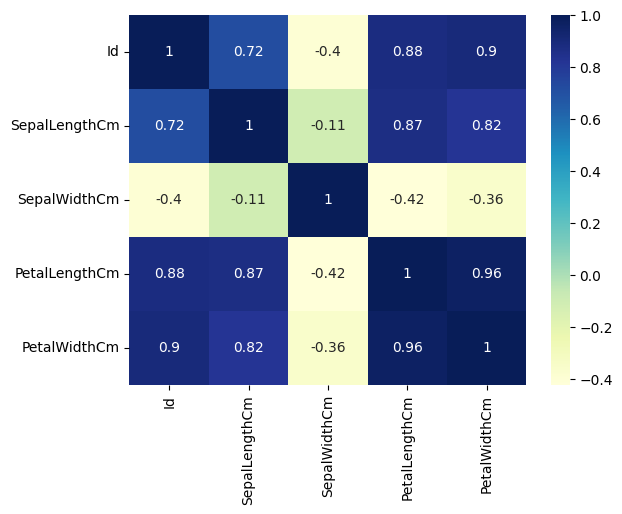

In [53]:
#Feature correlation
plt.figure()
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()
plt.close()

In [46]:
#Split th data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [47]:
#Fit the logistic regression model and make predictions
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [48]:
#Make predictions
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1])

In [51]:
#Estimate the performance metricies, confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
print('The confusion matrix for the logistic regression model: \n', confusion_matrix(y_pred, y_test))
print('The accuracy score for the logistic regression: ', accuracy_score(y_pred, y_test))
print('The precision score for the logistic regression: ', precision_score(y_pred, y_test))
print('The recall score for the logistic regression: ', recall_score(y_pred, y_test))
print('The classification Reports for the logistic regression: \n', classification_report(y_pred, y_test))

The confusion matrix for the logistic regression model: 
 [[19  0]
 [ 0 26]]
The accuracy score for the logistic regression:  1.0
The precision score for the logistic regression:  1.0
The recall score for the logistic regression:  1.0
The classification Reports for the logistic regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#Based on the performance model above, the 